# package_DBR

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from matplotlib import colors as mcolors

import package_DBR
from package_DBR import myRound, SelectPath_RT, Delay_RT, FO_RT, FOPDT, SOPDT, FOPDT_cost, SOPDT_cost, Process, Bode

 # myRound()

In [7]:
help(myRound)

Help on function myRound in module package_DBR:

myRound(x, base=5)
    Returns a float that is the closest multiple of "base" near "x"
    Based on: https://stackoverflow.com/questions/2272149/round-to-5-or-other-number-in-python
    
    :x: parameter that is rounded to a multiple of "base"
    :base: "base" parameter (optional: default value is 5)
    
    :return: rounded parameter



In [8]:
print(myRound(19.3,6))
print(myRound(21.5,6))

18.0
24.0


# SelectPath_RT()

In [9]:
help(SelectPath_RT)

Help on function SelectPath_RT in module package_DBR:

SelectPath_RT(path, time, signal)
    The function "SelectPath_RT" needs to be included in a "for or while loop".
    
    :path: dictionary input describing a path in time. Example: path = {0: 0, 5: 1, 50: 2, 80: 3, 100: 3}
    :time: time vector.
    :signal: signal vector that is being constructed using the input "path" and the vector "time".
    
    The function "SelectPath_RT" takes the last element in the vector "time" and, given the input "path", it appends the correct value to the vector "signal".



[False, False, False, False, False, False, False, False, False, False]


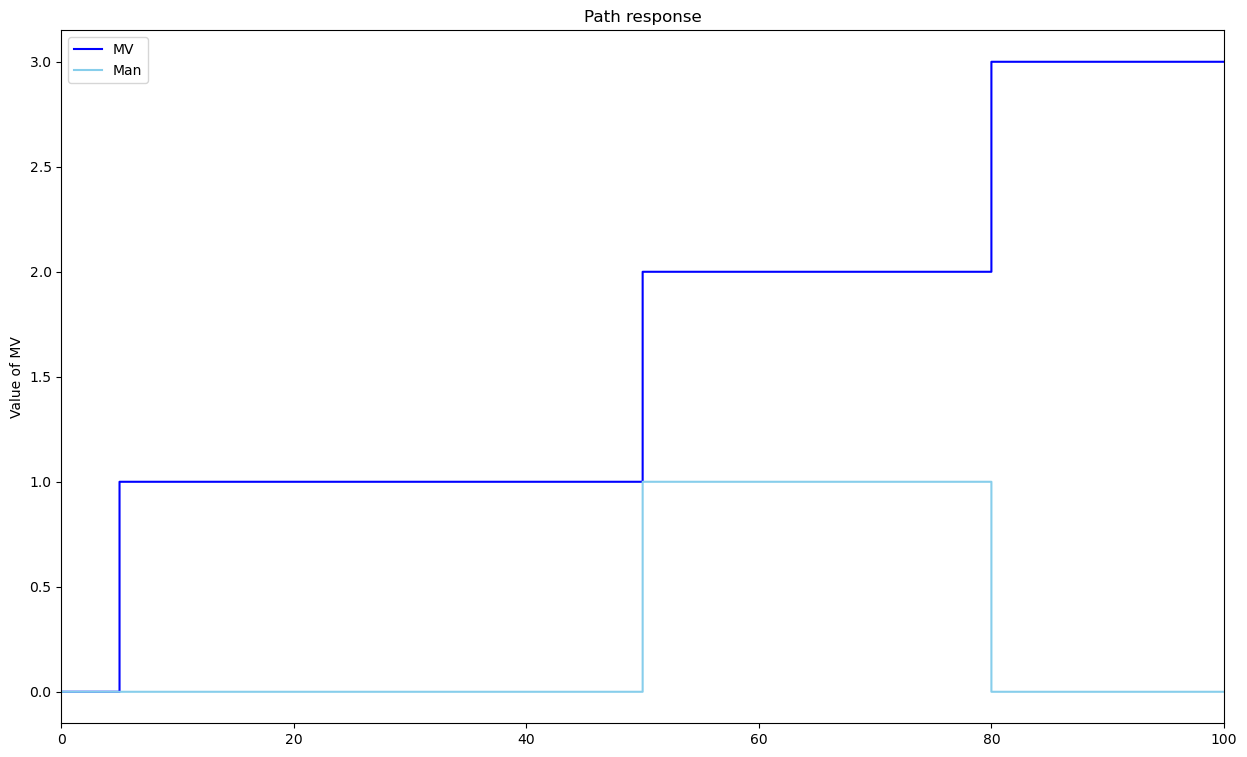

In [10]:
TSim = 100
Ts = 0.1
N = int(TSim/Ts) + 1

# Path for MV and MVMan
MVPath = {0: 0, 5: 1, 50: 2, 80: 3, TSim: 3} #signal carré qui va tourner dans une boucle 
                                            #entre 0 et 5 :0
                                            #entre 5 et 50 : 1
                                            #entre 50 et 80 : 2
                                            #après 80 : 3
ManPath = {0: False, 5: False, 50: True, 80: False, TSim: False} #signal binaire --> mode manuel

t = []
MV = []
Man = []

for i in range(0,N):
    t.append(i*Ts)
    SelectPath_RT(MVPath,t,MV)
    SelectPath_RT(ManPath,t,Man)    
    
plt.figure(figsize = (15,9))

plt.step(t,MV,'b-',label='MV',where='post')
plt.step(t,Man,'skyblue',label='Man',where='post')
plt.ylabel('Value of MV')
plt.legend(loc='best')
plt.title('Path response')
plt.xlim([0, TSim])

print(Man[0:10])

# Delay_RT()

In [11]:
help(Delay_RT)

Help on function Delay_RT in module package_DBR:

Delay_RT(MV, theta, Ts, MV_Delay, MVInit=0)
    The function "Delay Real Time" needs to be included in a "for or while loop".
    
    :MV: input vector
    :theta: delay [s]
    :Ts: sampling period [s]
    :MV_Delay: delayed input vector
    :MVInit: (optional: default value is 0)
    
    The function "Delay_RT" appends a value to the vector "MV_Delay".
    The appended value corresponds to the value in the vector "MV" "theta" seconds ago.
    If "theta" is not a multiple of "Ts", "theta" is replaced by Ts*int(np.ceil(theta/Ts)), i.e. the closest multiple of "Ts" larger than "theta".
    If the value of the vector "input" "theta" seconds ago is not defined, the value "MVInit" is used.



(0.0, 100.0)

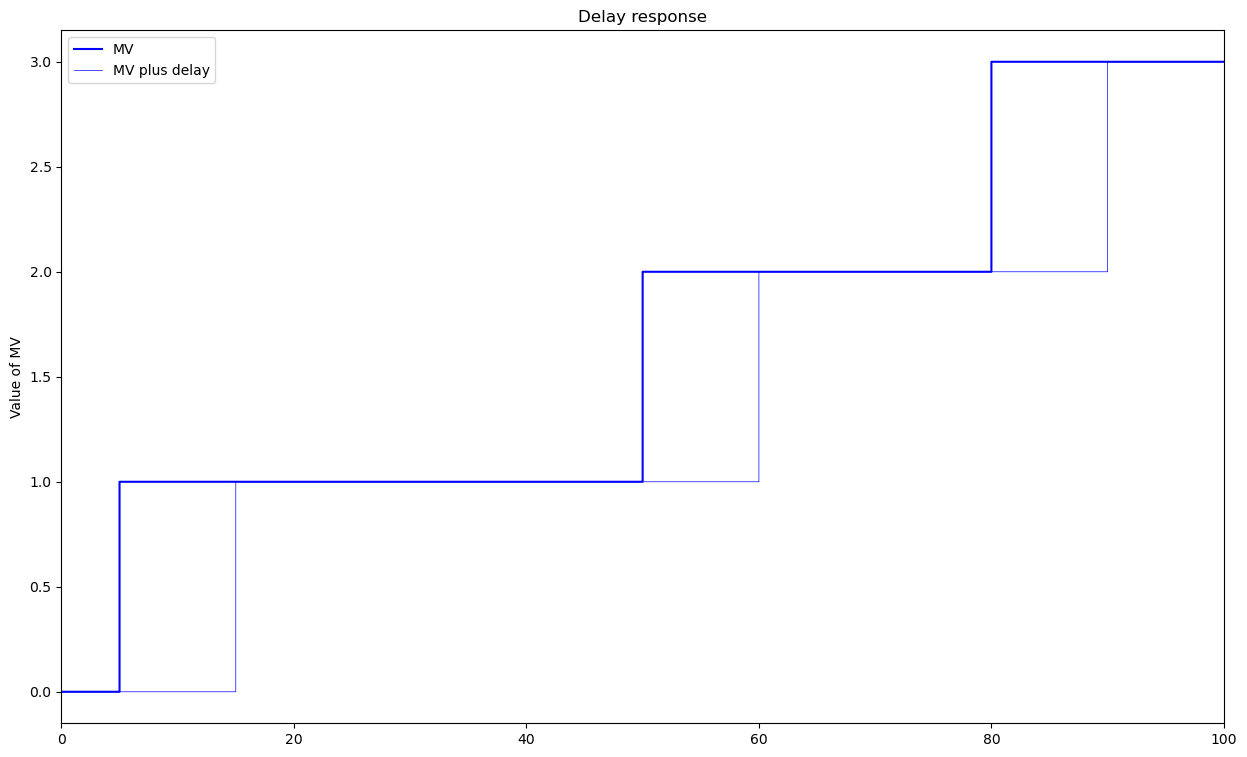

In [12]:
TSim = 100
Ts = 0.1
N = int(TSim/Ts) + 1

# Path for MV
MVPath = {0: 0, 5: 1, 50: 2, 80: 3, TSim: 3}

t = []
MV = []
MVDelay = []

# Parameters
theta = 10

for i in range(0,N):
    t.append(i*Ts)
    SelectPath_RT(MVPath,t,MV)
    Delay_RT(MV,theta,Ts,MVDelay)    
    
plt.figure(figsize = (15,9))

plt.step(t,MV,'b-',label='MV',where='post')
plt.step(t,MVDelay,'b-',linewidth=0.5,label='MV plus delay',where='post')
plt.ylabel('Value of MV')
plt.title('Delay response')
plt.legend(loc='best')
plt.xlim([0, TSim])   

# FO_RT()

In [13]:
help(FO_RT)

Help on function FO_RT in module package_DBR:

FO_RT(MV, Kp, T, Ts, PV, PVInit=0, method='EBD')
    The function "First order rael time needs to be included in a "for or while loop".
    
    :MV: input vector
    :Kp: process gain
    :T: lag time constant [s]
    :Ts: sampling period [s]
    :PV: output vector
    :PVInit: (optional: default value is 0)
    :method: discretisation method (optional: default value is 'EBD')
        EBD: Euler Backward difference
        EFD: Euler Forward difference
        TRAP: Trapezoïdal method
    
    The function "FO_RT" appends a value to the output vector "PV".
    The appended value is obtained from a recurrent equation that depends on the discretisation method.



(0.0, 100.0)

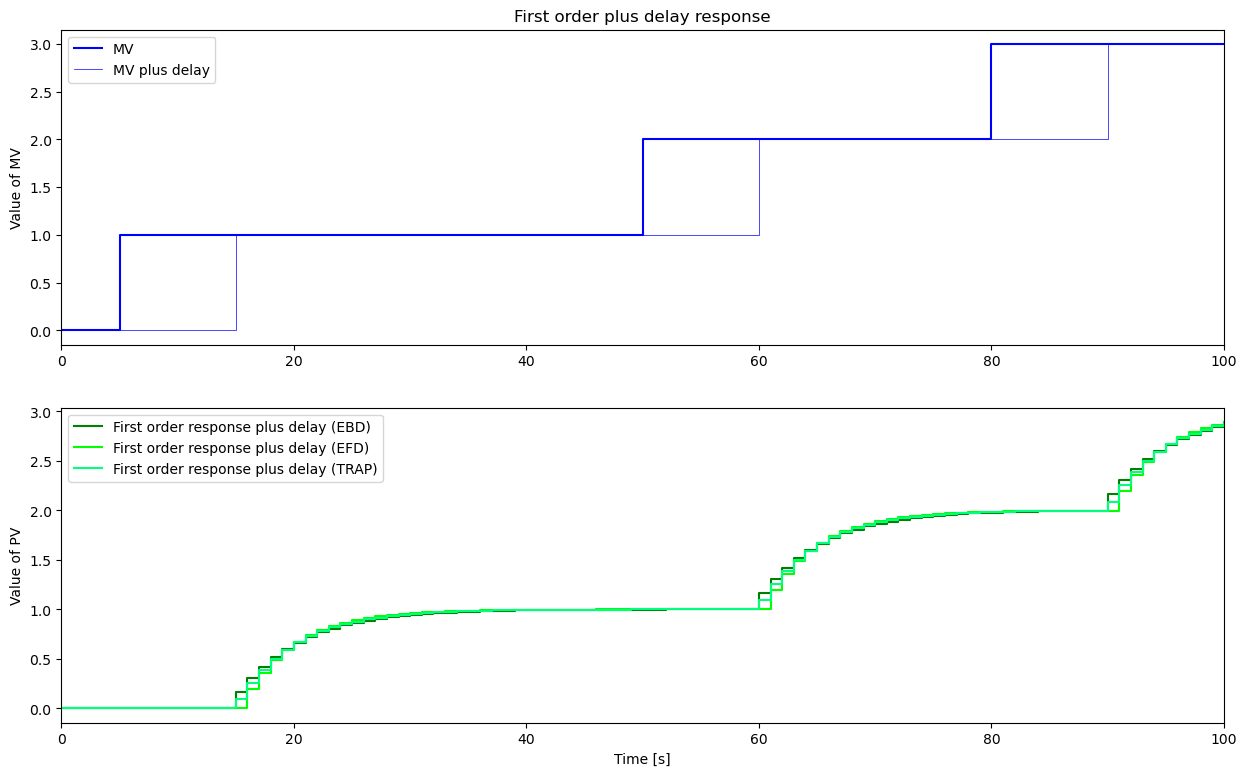

In [14]:
TSim = 100
Ts = 1
N = int(TSim/Ts) + 1

# Path for MV
MVPath = {0: 0, 5: 1, 50: 2, 80: 3, TSim: 3}

t = []
MV = []
MVDelay = []
PV_EBD = []
PV_EFD = []
PV_TRAP = []

# Parameters
Kp = 1
T = 5
theta = 10

for i in range(0,N):
    t.append(i*Ts)
    SelectPath_RT(MVPath,t,MV)
    Delay_RT(MV,theta,Ts,MVDelay)
    FO_RT(MVDelay,Kp,T,Ts,PV_EBD)
    FO_RT(MVDelay,Kp,T,Ts,PV_EFD,0,'EFD')
    FO_RT(MVDelay,Kp,T,Ts,PV_TRAP,0,'TRAP')
    
plt.figure(figsize = (15,9))

plt.subplot(2,1,1)
plt.step(t,MV,'b-',label='MV',where='post')
plt.step(t,MVDelay,'b-',linewidth=0.5,label='MV plus delay',where='post')
plt.ylabel('Value of MV')
plt.title('First order plus delay response')
plt.legend(loc='best')
plt.xlim([0, TSim])

plt.subplot(2,1,2)
plt.step(t,PV_EBD,'g-',label='First order response plus delay (EBD)',where='post')
plt.step(t,PV_EFD,'lime',label='First order response plus delay (EFD)',where='post')
plt.step(t,PV_TRAP,'springgreen',label='First order response plus delay (TRAP)',where='post')
plt.ylabel('Value of PV')
plt.xlabel('Time [s]')
plt.legend(loc='best')
plt.xlim([0, TSim])    

# FOPDT()

In [15]:
help(FOPDT)

Help on function FOPDT in module package_DBR:

FOPDT(MV, Kp, T, theta, Ts, MVInit=0, PVInit=0, method='EBD')
    The function "FOPDT" DOES NOT need to be included in a "for or while loop": this block is for offline use.
    
    :MV: input vector
    :Kp: process gain
    :T: lag time constant [s]
    :theta: delay [s]
    :Ts: sampling period [s]
    :MVInit: (optional: default value is 0)    
    :PVInit: (optional: default value is 0)
    :method: discretisation method (optional: default value is 'EBD')
        EBD: Euler Backward difference
        EFD: Euler Forward difference
        TRAP: Trapezoïdal method
        
    :return: simulated FOPDT output vector         
    
    The function "FOPDT" returns the simulated output FOPDT vector from the input vector "MV" and the input parameters.



(0.0, 100.0)

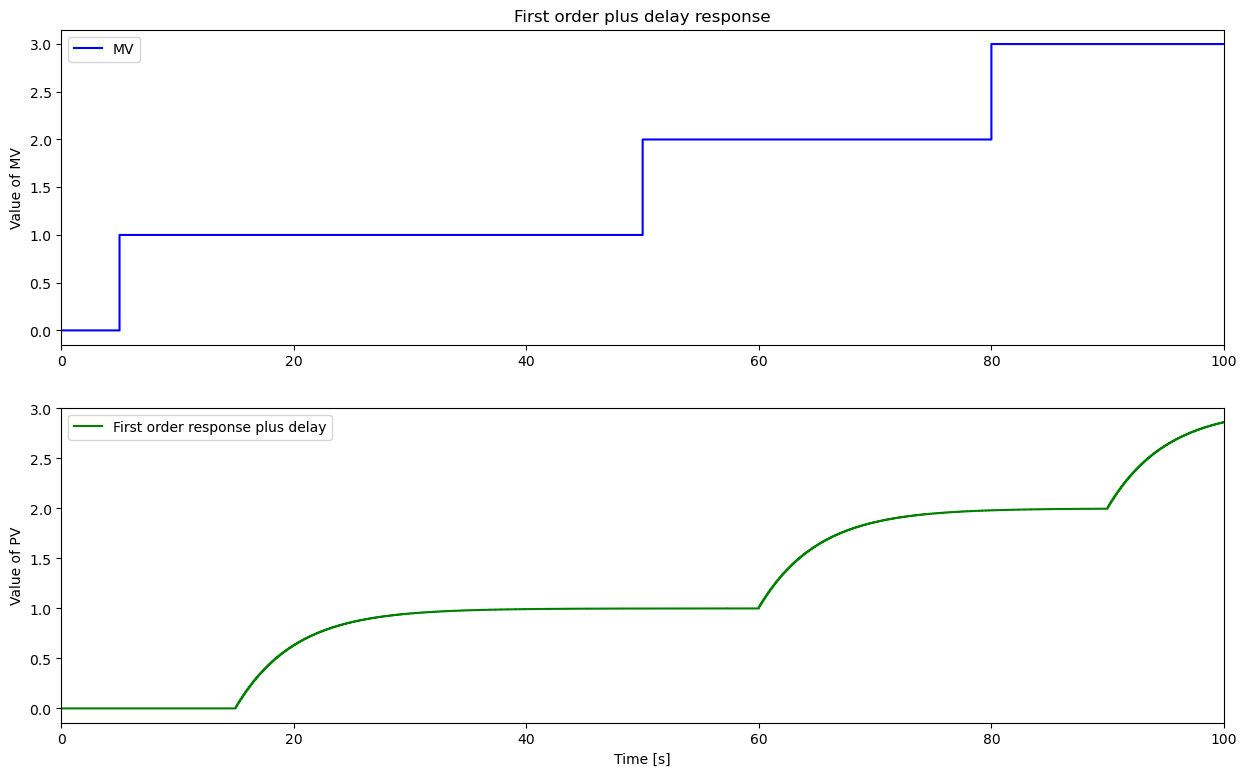

In [16]:
TSim = 100
Ts = 0.1
N = int(TSim/Ts) + 1

# Path for MV
MVPath = {0: 0, 5: 1, 50: 2, 80: 3, TSim: 3}

t = []
MV = []

# Parameters
Kp = 1
T = 5
theta = 10

# MV is created from MVPath
for i in range(0,N):
    t.append(i*Ts)
    SelectPath_RT(MVPath,t,MV)
    
PV = FOPDT(MV,Kp,T,theta,Ts)
    
plt.figure(figsize = (15,9))

plt.subplot(2,1,1)
plt.step(t,MV,'b-',label='MV',where='post')
plt.ylabel('Value of MV')
plt.title('First order plus delay response')
plt.legend(loc='best')
plt.xlim([0, TSim])

plt.subplot(2,1,2)
plt.step(t,PV,'g-',label='First order response plus delay',where='post')
plt.ylabel('Value of PV')
plt.xlabel('Time [s]')
plt.legend(loc='best')
plt.xlim([0, TSim])    

# SOPDT()

In [17]:
help(SOPDT)

Help on function SOPDT in module package_DBR:

SOPDT(MV, Kp, T1, T2, theta, Ts, MVInit=0, PVInit=0, method='EBD')
    The function "SOPDT" DOES NOT need to be included in a "for or while loop": this block is for offline use.
    
    :MV: input vector
    :Kp: process gain
    :T1: first (or main) lag time constant [s]
    :T2: second lag time constant [s]    
    :theta: delay [s]
    :Ts: sampling period [s]
    :MVInit: (optional: default value is 0)    
    :PVInit: (optional: default value is 0)
    :method: discretisation method (optional: default value is 'EBD')
        EBD: Euler Backward difference
        EFD: Euler Forward difference
        TRAP: Trapezoïdal method
        
    :return: simulated SOPDT output vector         
    
    The function "SOPDT" returns the simulated SOPDT output vector from the input vector "MV" and the input parameters.



(0.0, 100.0)

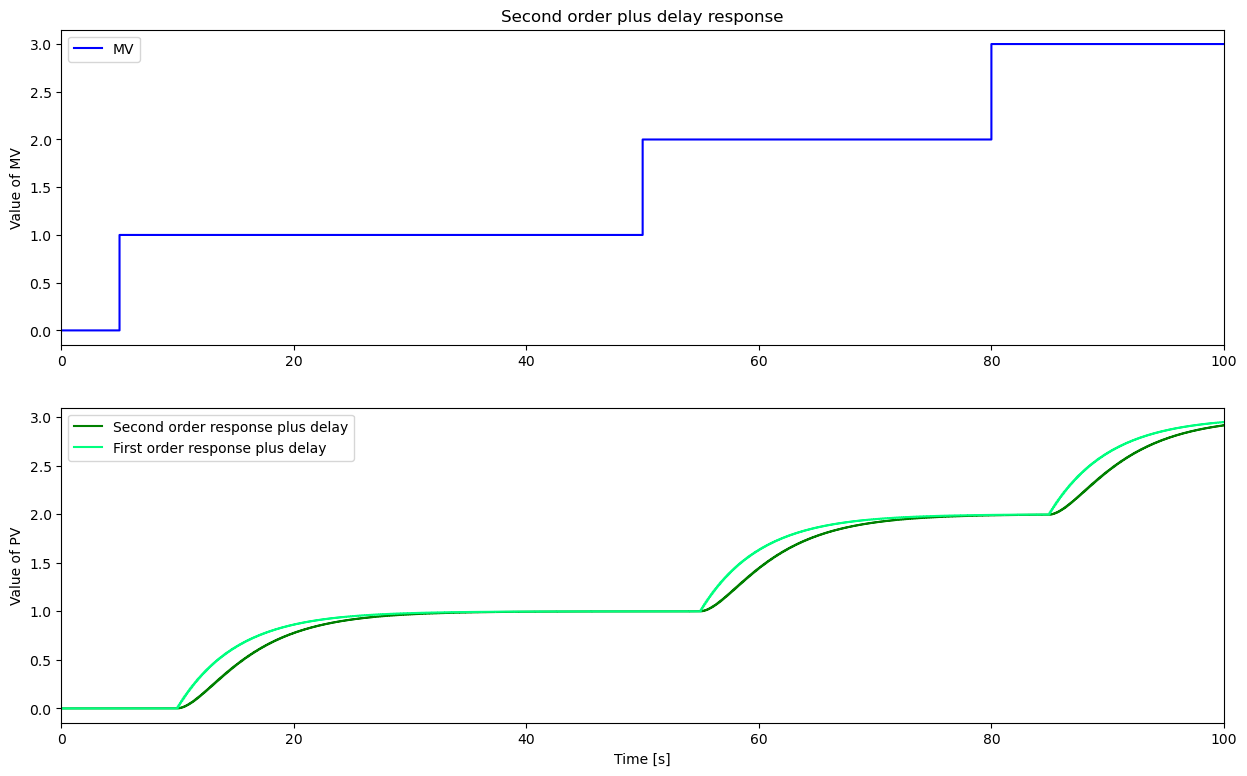

In [18]:
TSim = 100
Ts = 0.1
N = int(TSim/Ts) + 1

# Path for MV
MVPath = {0: 0, 5: 1, 50: 2, 80: 3, TSim: 3}

t = []
MV = []

# Parameters
Kp = 1.0
theta = 5.0
T1 = 5.0
T2 = 2.0

# MV is created from MVPath
for i in range(0,N):
    t.append(i*Ts)
    SelectPath_RT(MVPath,t,MV)
    
PVFOPDT = FOPDT(MV,Kp,T1,theta,Ts)
PVSOPDT = SOPDT(MV,Kp,T1,T2,theta,Ts)
    
plt.figure(figsize = (15,9))

plt.subplot(2,1,1)
plt.step(t,MV,'b-',label='MV',where='post')
plt.ylabel('Value of MV')
plt.title('Second order plus delay response')
plt.legend(loc='best')
plt.xlim([0, TSim])

plt.subplot(2,1,2)
plt.step(t,PVSOPDT,'g-',label='Second order response plus delay',where='post')
plt.step(t,PVFOPDT,'springgreen',label='First order response plus delay',where='post')
plt.ylabel('Value of PV')
plt.xlabel('Time [s]')
plt.legend(loc='best')
plt.xlim([0, TSim])    

# FOPDT_cost() and identification of a FOPDT model

In [19]:
help(FOPDT_cost)

Help on function FOPDT_cost in module package_DBR:

FOPDT_cost(p, MV, PV, Ts, *args)
    :p: parameter vector:
        Kp = p[0]: process gain
        T = p[1]: lag time constant [s]
        theta = p[2]: delay [s]
    :MV: input vector used during experimentation
    :PV: experimental output vector obtained in response to the input vector MV
    :Ts: sampling period [s]
    :args: object, axes and line handles for representing PV and the simulated PV at each function call (optional)
        fig: figure object
        ax1: axes object
        l1: line object for PV
        l2: line object for simulated PV
        
    :return: identification cost with FOPDT model
    
    The function "FOPDT_cost" returns the identification cost, i.e. the sum of the model errors squared.
    The model error is the difference between the experimental output "PV" and the simulated output with a FOPDT model and the parameter set "p".
    
    The assumption is that MVInit and PVInit are zero for the use o

In [20]:
MVm = MV
PVm = PVFOPDT
# PVm = PVSOPDT

# Initial values
p0 = np.zeros(3)
p0[0] = 1.1 # K
p0[1] = 10.0 # T
p0[2] = 2.0 # theta

# Bounds on parameters
bnds = ((None, None), (0, None), (0, None))

cost = FOPDT_cost(p0,MVm,PVm,Ts)
print('Initial cost: ' + str(cost))

Initial cost: 17.14598683731344


### Without visualisation

In [21]:
solution = minimize(FOPDT_cost,p0,args=(MVm,PVm,Ts), method='Powell', bounds=bnds, options={'disp': True})
p = solution.x
print('Final SSE Objective: ' + str(FOPDT_cost(p,MVm,PVm,Ts)))

K = p[0]
T = p[1]
theta  = p[2]

print('K: ' + str(K))
print('T: ' + str(T))
print('theta: ' + str(theta))  

Optimization terminated successfully.
         Current function value: 0.014575
         Iterations: 10
         Function evaluations: 527
Final SSE Objective: 0.01457516668064826
K: 0.9996430262805386
T: 4.887868724433924
theta: 5.094677925907897


### With visualisation (slower)

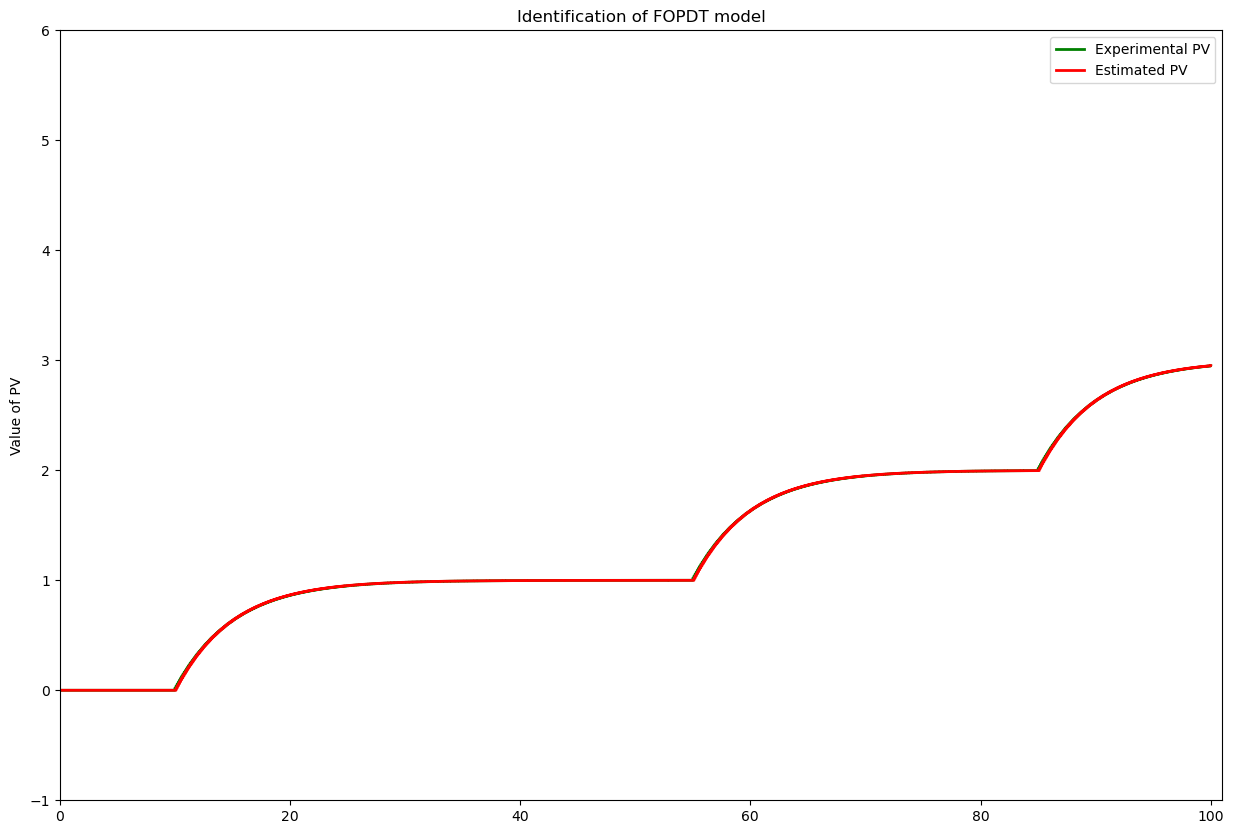

Final SSE Objective: 0.01457516668064826
K: 0.9996430262805386
T: 4.887868724433924
theta: 5.094677925907897


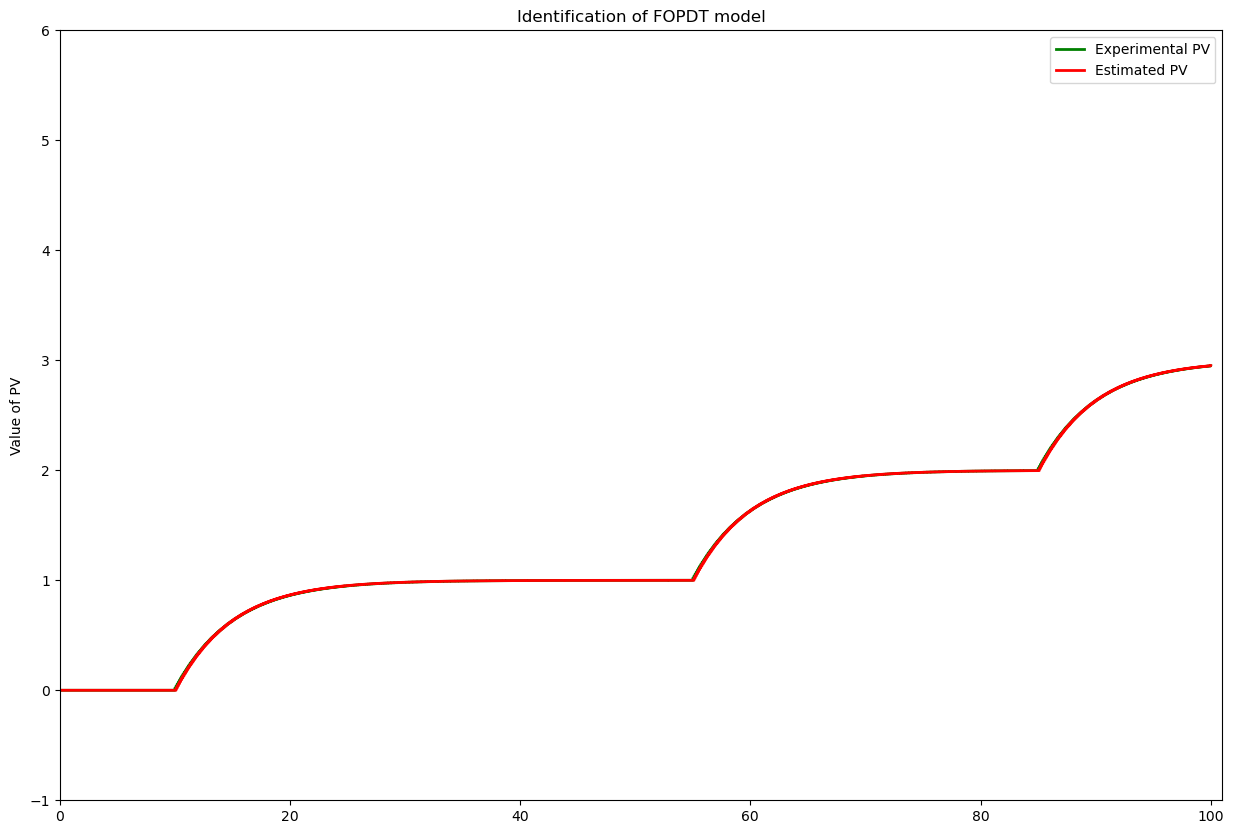

In [22]:
p0 = np.zeros(3)
p0[0] = 1.1 # K
p0[1] = 10.0 # T
p0[2] = 2.0 # theta

fig, ax1 = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(15)
l1, = ax1.step([0,1],[0,1],'g-',linewidth=2,label='Experimental PV',where='post')
l2, = ax1.step([0,1],[0,1],'r-',linewidth=2,label='Estimated PV',where='post')
ax1.set_ylabel('Value of PV')
ax1.set_title('Identification of FOPDT model')
ax1.legend(loc='best')

solution = minimize(FOPDT_cost,p0,args=(MVm,PVm,Ts,(fig,ax1,l1,l2)), method='Powell', bounds=bnds)
p = solution.x
print('Final SSE Objective: ' + str(FOPDT_cost(p,MVm,PVm,Ts)))

K = p[0]
T = p[1]
theta  = p[2]

print('K: ' + str(K))
print('T: ' + str(T))
print('theta: ' + str(theta))   

# SOPDT_cost() and identification of a SOPDT model

In [23]:
help(SOPDT_cost)

Help on function SOPDT_cost in module package_DBR:

SOPDT_cost(p, MV, PV, Ts, *args)
    :p: parameter vector:
        Kp = p[0]: process gain
        T1 = p[1]: first or main lag time constant [s]
        T2 = p[2]: second lag time constant [s]    
        theta = p[3]: delay [s]
    :MV: input vector used during experimentation
    :PV: experimental output vector obtained in response to the input vector MV
    :Ts: sampling period [s]
    :args: object, axes and line handles for representing PV and the simulated PV at each function call (optional)
        fig: figure object
        ax1: axes object
        l1: line object for PV
        l2: line object for simulated PV
        
    :return: identification cost with SOPDT model
    
    The function "SOPDT_cost" returns the identification cost, i.e. the sum of the model errors squared.
    The model error is the difference between the experimental output "PV" and the simulated output with a SOPDT model and the parameter set "p".
    


In [24]:
MVm = MV
PVm = PVSOPDT

# Initial values
p0 = np.zeros(4)
p0[0] = 1.1 # K
p0[1] = 10.0 # T
p0[2] = 1.0 # T
p0[3] = 2.0 # theta

# Bounds on parameters
bnds = ((None, None), (0, None), (0, None), (0, None))

cost = SOPDT_cost(p0,MVm,PVm,Ts)
print('Initial cost: ' + str(cost))

Initial cost: 23.525410594878732


### Without visualisation

In [25]:
solution = minimize(SOPDT_cost,p0,args=(MVm,PVm,Ts), method='Powell', bounds=bnds, options={'disp': True})
p = solution.x
print('Final SSE Objective: ' + str(SOPDT_cost(p,MVm,PVm,Ts)))

K = p[0]
T1 = p[1]
T2 = p[2]
theta  = p[3]

print('K: ' + str(K))
print('T1: ' + str(T1))
print('T2: ' + str(T2))
print('theta: ' + str(theta))   

Optimization terminated successfully.
         Current function value: 0.007599
         Iterations: 9
         Function evaluations: 497
Final SSE Objective: 0.007598845904494472
K: 0.9994792872612267
T1: 4.832730805374109
T2: 2.3196098432123504
theta: 4.742247269700665


### With visualisation (slower)

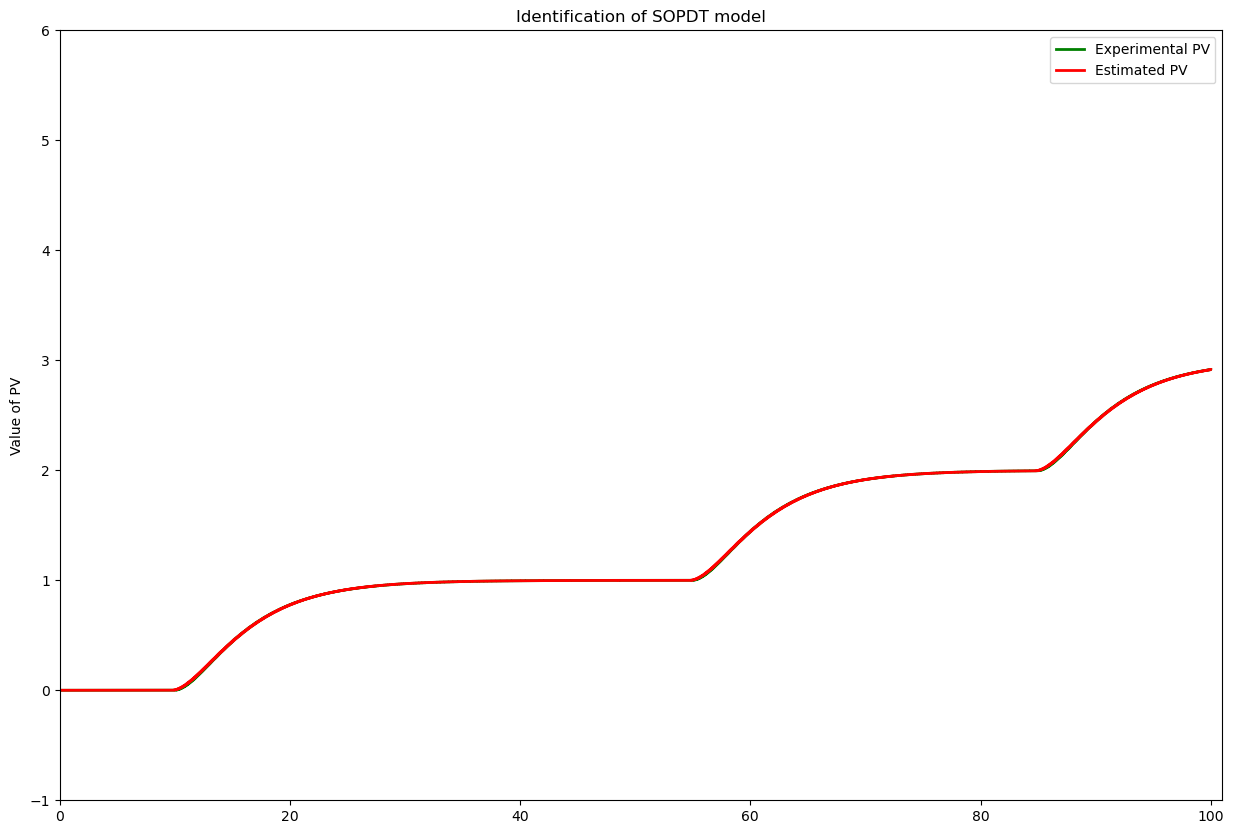

Final SSE Objective: 0.007598845904494472
K: 0.9994792872612267
T1: 4.832730805374109
T2: 2.3196098432123504
theta: 4.742247269700665


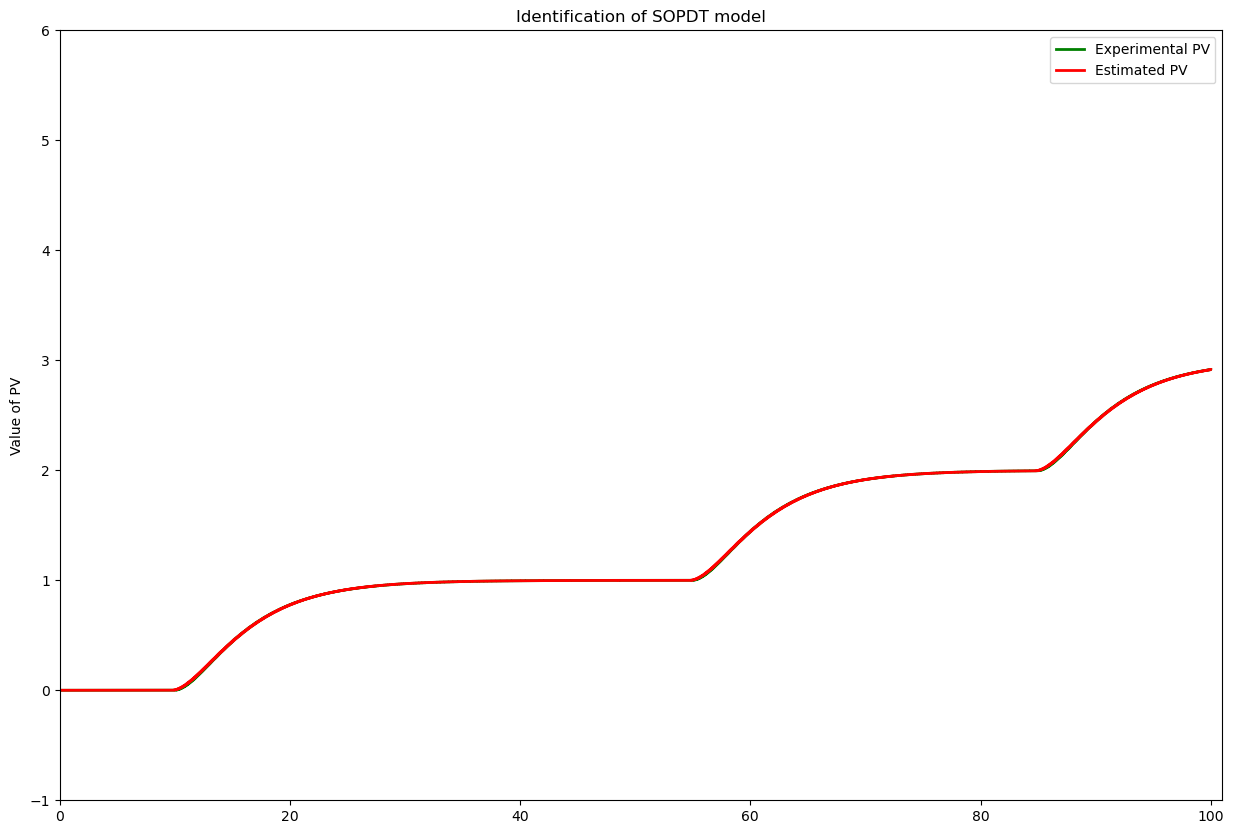

In [26]:
p0 = np.zeros(4)
p0[0] = 1.1 # K
p0[1] = 10.0 # T
p0[2] = 1.0 # T
p0[3] = 2.0 # theta

fig, ax1 = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(15)
l1, = ax1.step([0,1],[0,1],'g-',linewidth=2,label='Experimental PV',where='post')
l2, = ax1.step([0,1],[0,1],'r-',linewidth=2,label='Estimated PV',where='post')
ax1.set_ylabel('Value of PV')
ax1.set_title('Identification of SOPDT model')
ax1.legend(loc='best')

solution = minimize(SOPDT_cost,p0,args=(MVm,PVm,Ts,(fig,ax1,l1,l2)), method='Powell', bounds=bnds)
p = solution.x
print('Final SSE Objective: ' + str(SOPDT_cost(p,MVm,PVm,Ts)))

K = p[0]
T1 = p[1]
T2 = p[2]
theta  = p[3]

print('K: ' + str(K))
print('T1: ' + str(T1))
print('T2: ' + str(T2))
print('theta: ' + str(theta))   

# Bode()

In [27]:
help(Bode)

Help on function Bode in module package_DBR:

Bode(P, omega, Show=True)
    :P: Process as defined by the class "Process".
        Use the following command to define the default process which is simply a unit gain process:
            P = Process({})
        
        A delay, two lead time constants and 2 lag constants can be added.
        
        Use the following commands for a SOPDT process:
            P.parameters['Kp'] = 1.1
            P.parameters['Tlag1'] = 10.0
            P.parameters['Tlag2'] = 2.0
            P.parameters['theta'] = 2.0
        
        Use the following commands for a unit gain Lead-lag process:
            P.parameters['Tlag1'] = 10.0        
            P.parameters['Tlead1'] = 15.0        
        
    :omega: frequency vector (rad/s); generated by a command of the type "omega = np.logspace(-2, 2, 10000)".
    :Show: boolean value (optional: default value = True). If Show = True, the Bode diagram is shown. Otherwise Ps (P(j omega)) (vector of comple

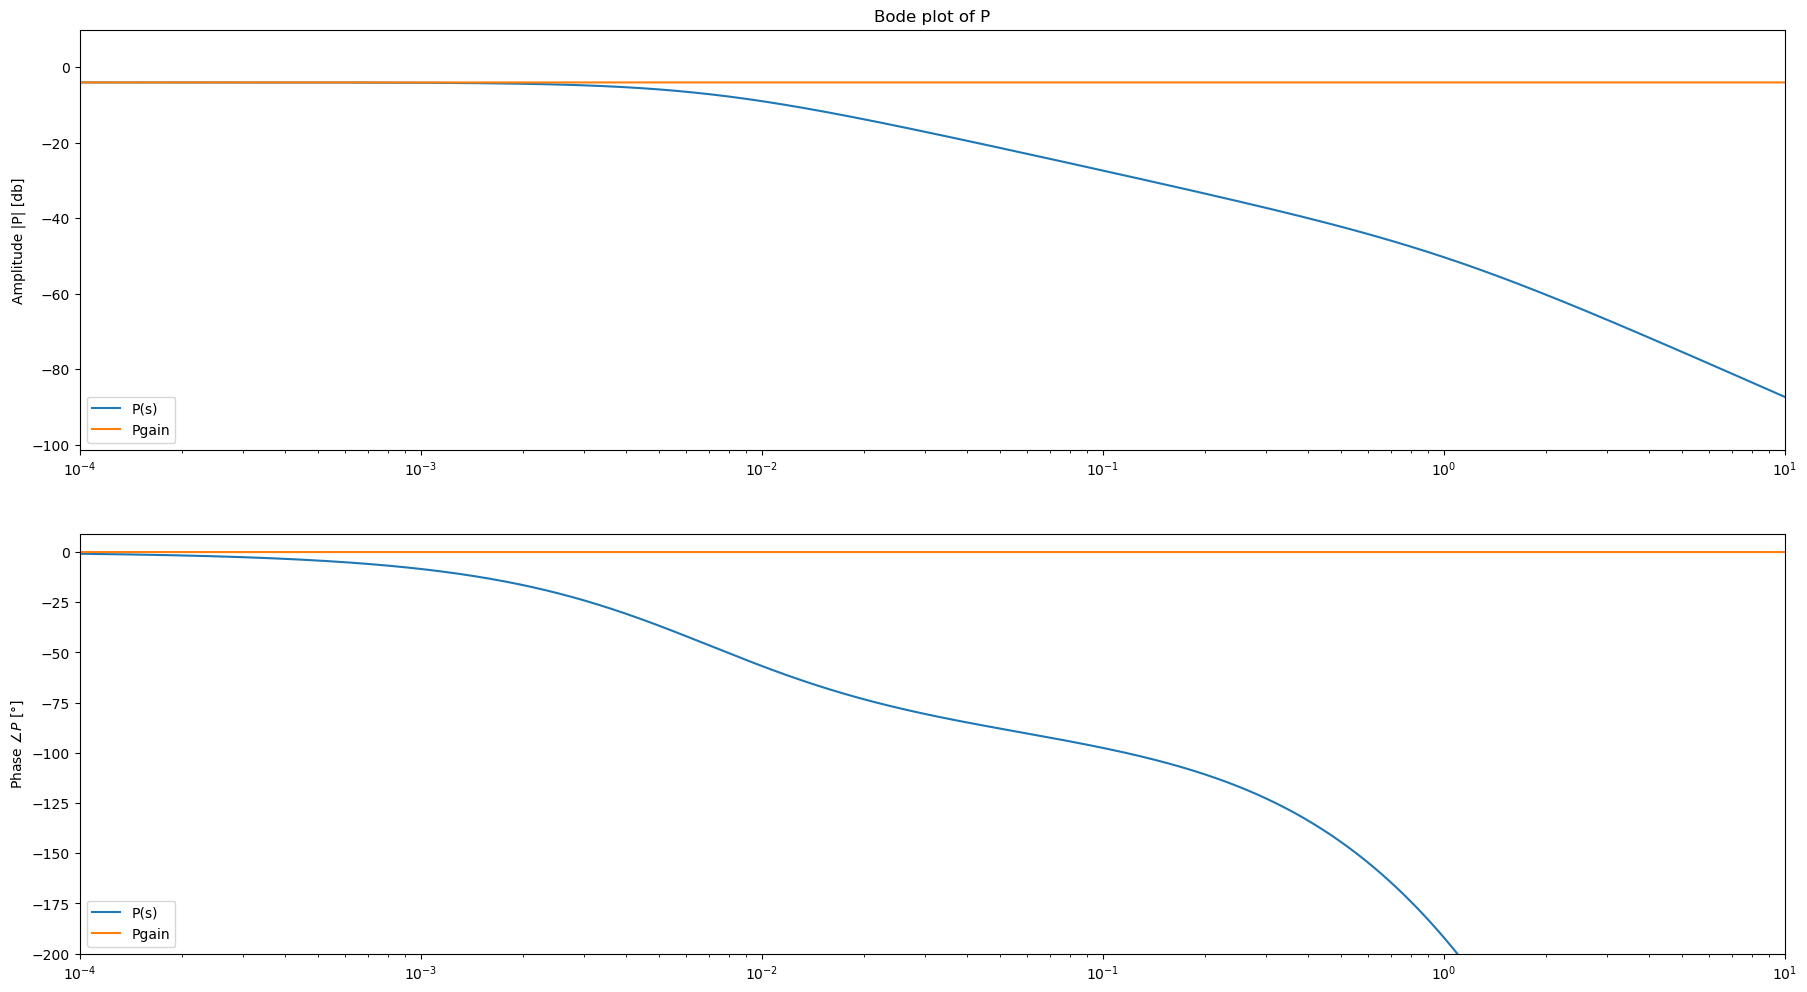

In [28]:
P = Process({}) # Default process = unit gain

# Parameters for input-output dynamics P(s)
P.parameters['Kp'] = 0.63
P.parameters['Tlag1'] = 146.0
P.parameters['Tlag2'] = 1.0
P.parameters['theta'] = 1.0

omega = np.logspace(-4, 1, 10000)

Bode(P,omega)